In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath("")))
from dependencies.constants import *

## plot helpers

In [2]:
def get_image_paths(df_row):
    export_folder = os.path.join(exports_folder, df_row["recording id"])
    image_paths = np.empty((4), dtype=object)
    for i, (camera_folder,index_name) in enumerate(zip(camera_folders, indices_names)):
        image_paths[i] = os.path.join(export_folder, camera_folder, str(df_row[index_name])+ ".png")
    return image_paths

def get_images(image_paths):
    images = []
    for image_path in image_paths:
        images.append(plt.imread(image_path))
    return images

## plot 10 random samples

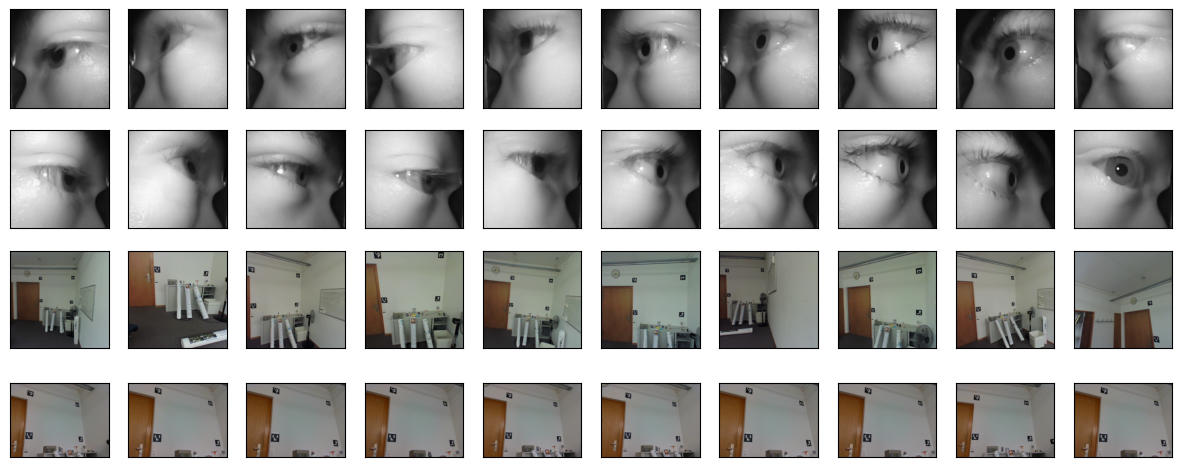

<Axes: xlabel='laser_2D_u_depth_camera', ylabel='laser_2D_v_depth_camera'>

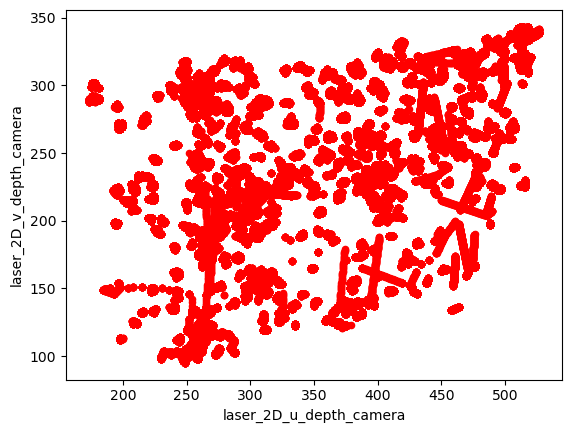

In [11]:

exports_df = pd.read_csv(os.path.join(exports_folder, "all_df.csv"))
#select 10 random rows
random_df = exports_df.sample(n=10)
#apply function to each row
image_paths = random_df.apply(lambda x: get_image_paths(x), axis=1)

#images is a list of lists of 4 images (one for each camera) for each row
images = []
for image_path in image_paths:
    images.append(get_images(image_path))

#plot images
fig, axes = plt.subplots(4, 10, figsize=(15, 6),
                            subplot_kw={'xticks': [], 'yticks': []})
#plot from top to bottom, left to right
for i in range(10):
    for j in range(4):
        #rotate left when j == 0 and rotate right when j == 1
        if j == 0:
            axes[j, i].imshow(np.rot90(images[i][j], k=1))
        elif j == 1:
            axes[j, i].imshow(np.rot90(images[i][j], k=1))
        else:
            axes[j, i].imshow(images[i][j])

plt.show()



In [13]:
#isntall seaborn conda
!conda install seaborn -y

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::brotli==1.0.9=h166bdaf_7
  - defaults/linux-64::matplotlib-base==3.7.1=py38h417a72b_1
  - defaults/linux-64::matplotlib==3.7.1=py38h06a4308_1
  - defaults/noarch::fonttools==4.25.0=pyhd3eb1b0_0
  - pypi/pypi::open3d==0.17.0=pypi_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /scratch_net/snapo/mlindner/conda_envs/gazeacq

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9     

In [26]:
import seaborn as sns

#draw a heatmap of the gaze points
laser_coordinates_names = ["laser_2D_u_depth_camera", "laser_2D_v_depth_camera"]
#plot heatmap

laser_positions_index = exports_df.index
laser_positions = exports_df[laser_coordinates_names].to_numpy()
sns.heatmap(laser_positions, index=laser_positions.index, cmap="YlGnBu")


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [24]:
laser_positions

,laser_2D_u_depth_camera,laser_2D_v_depth_camera
0,282.000000,217.000000
1,282.000000,217.000000
2,282.000000,217.000000
3,282.000000,217.000000
4,282.000000,217.000000
...,...,...
216122,467.000000,288.000000
216123,467.000000,288.000000
216124,466.972973,287.945946
216125,466.945946,287.891892
